## Installing Dependancies

In [ ]:
!pip install opencv-python

In [ ]:
from google.colab.patches import cv2_imshow

## Applying Sobel Operator to whole image

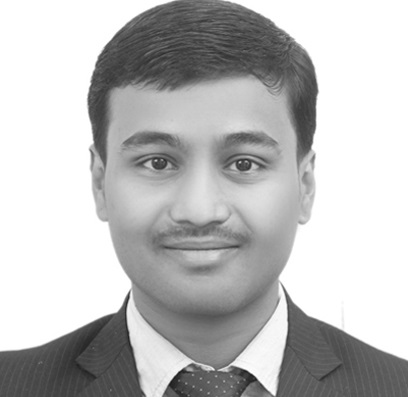

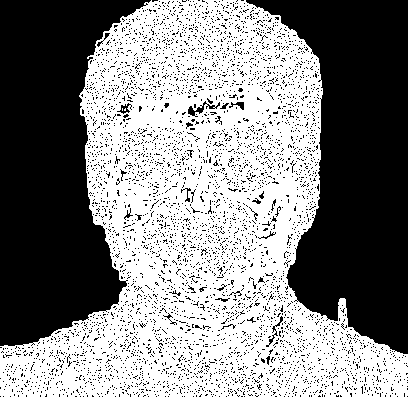

In [ ]:
from google.colab.patches import cv2_imshow
import cv2
import numpy as np

def detect_edges_in_eyes(image_path):
    # Read the image
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Apply GaussianBlur to reduce noise and help with edge detection
    blurred_img = cv2.GaussianBlur(img, (5, 5), 0)

    # Apply the Sobel operator to find edges
    sobel_x = cv2.Sobel(blurred_img, cv2.CV_64F, 1, 0, ksize=5)
    sobel_y = cv2.Sobel(blurred_img, cv2.CV_64F, 0, 1, ksize=5)

    # Combine the x and y gradients to get the final edge-detected image
    edges = np.sqrt(sobel_x**2 + sobel_y**2)
    edges = np.uint8(edges)

    # Thresholding to highlight edges
    _, thresholded = cv2.threshold(edges, 30, 255, cv2.THRESH_BINARY)

    # Display the original image and the edge-detected image
    cv2_imshow(img)
    cv2_imshow(thresholded)

# Replace 'path_to_your_image.jpg' with the actual path to your image file
image_path = '/content/input_Ashish.jpg'
detect_edges_in_eyes(image_path)


## Applying Sobel operator to Eyes

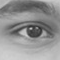

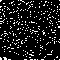

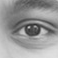

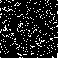

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

def detect_edges_in_eyes(image_path):
    # Load the pre-trained face and eye cascades
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
    eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')

    # Read the image
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Detect faces in the image
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.3, minNeighbors=5)

    for (x, y, w, h) in faces:
        roi_gray = gray[y:y + h, x:x + w]
        roi_color = img[y:y + h, x:x + w]

        # Detect eyes in each face region
        eyes = eye_cascade.detectMultiScale(roi_gray)

        for (ex, ey, ew, eh) in eyes:
            eye_roi = roi_gray[ey:ey + eh, ex:ex + ew]

            # Apply GaussianBlur to reduce noise and help with edge detection
            blurred_eye = cv2.GaussianBlur(eye_roi, (5, 5), 0)

            # Apply the Sobel operator to find edges
            sobel_x = cv2.Sobel(blurred_eye, cv2.CV_64F, 1, 0, ksize=5)
            sobel_y = cv2.Sobel(blurred_eye, cv2.CV_64F, 0, 1, ksize=5)

            # Combine the x and y gradients to get the final edge-detected image
            edges = np.sqrt(sobel_x**2 + sobel_y**2)
            edges = np.uint8(edges)

            # Thresholding to highlight edges
            _, thresholded = cv2.threshold(edges, 30, 255, cv2.THRESH_BINARY)

            # Invert the colors
            inverted_thresholded = cv2.bitwise_not(thresholded)

            # Display the original eye and the inverted, edge-detected eye
            cv2_imshow(eye_roi)
            cv2_imshow(inverted_thresholded)

# Replace 'path_to_your_image.jpg' with the actual path to your image file
image_path = '/content/input_Ashish.jpg'
detect_edges_in_eyes(image_path)



## Applying Canny edge detector to Eyes

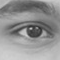

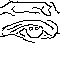

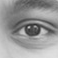

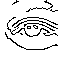

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

def detect_edges_in_eyes_canny(image_path):
    # Load the pre-trained face and eye cascades
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
    eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')

    # Read the image
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Detect faces in the image
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.3, minNeighbors=5)

    for (x, y, w, h) in faces:
        roi_gray = gray[y:y + h, x:x + w]
        roi_color = img[y:y + h, x:x + w]

        # Detect eyes in each face region
        eyes = eye_cascade.detectMultiScale(roi_gray)

        for (ex, ey, ew, eh) in eyes:
            eye_roi = roi_gray[ey:ey + eh, ex:ex + ew]

            # Apply GaussianBlur to reduce noise
            blurred_eye = cv2.GaussianBlur(eye_roi, (5, 5), 0)

            # Apply the Canny edge detector
            edges = cv2.Canny(blurred_eye, 30, 100)

            # Invert the colors
            inverted_edges = cv2.bitwise_not(edges)

            # Display the original eye and the inverted, edge-detected eye
            cv2_imshow(eye_roi)
            cv2_imshow(inverted_edges)

# Replace 'path_to_your_image.jpg' with the actual path to your image file
image_path = '/content/input_Ashish.jpg'
detect_edges_in_eyes_canny(image_path)


## Applying Prewitt edge detector to Eyes

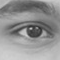

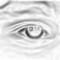

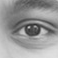

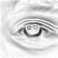

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

def prewitt_operator(img):
    # Define the Prewitt operator kernels
    kernel_x = np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]])
    kernel_y = np.array([[-1, -1, -1], [0, 0, 0], [1, 1, 1]])

    # Apply the kernels to get gradients in x and y directions
    gradient_x = cv2.filter2D(img, cv2.CV_64F, kernel_x)
    gradient_y = cv2.filter2D(img, cv2.CV_64F, kernel_y)

    # Combine the x and y gradients to get the final edge-detected image
    edges = np.sqrt(gradient_x**2 + gradient_y**2)
    edges = np.uint8(edges)

    return edges

def detect_edges_in_eyes_prewitt(image_path):
    # Load the pre-trained face and eye cascades
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
    eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')

    # Read the image
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Detect faces in the image
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.3, minNeighbors=5)

    for (x, y, w, h) in faces:
        roi_gray = gray[y:y + h, x:x + w]
        roi_color = img[y:y + h, x:x + w]

        # Detect eyes in each face region
        eyes = eye_cascade.detectMultiScale(roi_gray)

        for (ex, ey, ew, eh) in eyes:
            eye_roi = roi_gray[ey:ey + eh, ex:ex + ew]

            # Apply GaussianBlur to reduce noise
            blurred_eye = cv2.GaussianBlur(eye_roi, (5, 5), 0)

            # Apply the Prewitt edge detector
            edges = prewitt_operator(blurred_eye)

            # Invert the colors
            inverted_edges = cv2.bitwise_not(edges)

            # Display the original eye and the inverted, edge-detected eye
            cv2_imshow(eye_roi)
            cv2_imshow(inverted_edges)

# Replace 'path_to_your_image.jpg' with the actual path to your image file
image_path = '/content/input_Ashish.jpg'
detect_edges_in_eyes_prewitt(image_path)


## Prewitt for 2 kernals

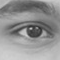

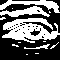

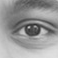

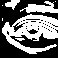

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

def prewitt_operator(img):
    # Define the Prewitt operator kernels
    kernel_x = np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]])
    kernel_y = np.array([[-1, -1, -1], [0, 0, 0], [1, 1, 1]])

    # Apply the kernels to get gradients in x and y directions
    gradient_x = cv2.filter2D(img, cv2.CV_64F, kernel_x)
    gradient_y = cv2.filter2D(img, cv2.CV_64F, kernel_y)

    # Combine the x and y gradients to get the final edge-detected image
    edges = np.sqrt(gradient_x**2 + gradient_y**2)
    edges = np.uint8(edges)

    return edges

def detect_edges_in_eyes_prewitt(image_path):
    # Load the pre-trained face and eye cascades
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
    eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')

    # Read the image
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Detect faces in the image
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.3, minNeighbors=5)

    for (x, y, w, h) in faces:
        roi_gray = gray[y:y + h, x:x + w]
        roi_color = img[y:y + h, x:x + w]

        # Detect eyes in each face region
        eyes = eye_cascade.detectMultiScale(roi_gray)

        for (ex, ey, ew, eh) in eyes:
            eye_roi = roi_gray[ey:ey + eh, ex:ex + ew]

            # Apply GaussianBlur to reduce noise
            blurred_eye = cv2.GaussianBlur(eye_roi, (5, 5), 0)

            # Apply the Prewitt edge detector
            edges = prewitt_operator(blurred_eye)

            # Apply binary threshold to generate black and white output
            _, binary_output = cv2.threshold(edges, 30, 255, cv2.THRESH_BINARY)

            # Invert the colors
            inverted_binary_output = cv2.bitwise_not(binary_output)

            # Find contours in the inverted binary output
            contours, _ = cv2.findContours(inverted_binary_output, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

            # Sort contours based on area and get the largest one
            largest_contour = max(contours, key=cv2.contourArea)

            # Find the convex hull of the largest contour
            hull = cv2.convexHull(largest_contour)

            # Draw circles at the last 2 endpoints of the convex hull
            for point in hull[-2:]:
                cv2.circle(roi_color, tuple(point[0]), 5, (0, 255, 0), -1)

            # Display the original eye, the binary output, and the highlighted endpoints
            cv2_imshow(eye_roi)
            cv2_imshow(binary_output)
            # cv2_imshow(roi_color)

# Replace 'path_to_your_image.jpg' with the actual path to your image file
image_path = '/content/input_Ashish.jpg'
detect_edges_in_eyes_prewitt(image_path)


## Prewitt for 4 kernels

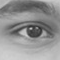

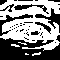

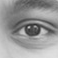

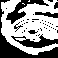

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

def multi_direction_edge_operator(img):
    # Define the edge detection kernels for 0, 45, 90, and 135 degrees
    kernels = [
        np.array([[1, 0, -1], [1, 0, -1], [1, 0, -1]]),  # 0 degrees
        np.array([[1, 1, 0], [1, 0, -1], [0, -1, -1]]),  # 45 degrees
        np.array([[1, 1, 1], [0, 0, 0], [-1, -1, -1]]),  # 90 degrees
        np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]])   # 135 degrees
    ]

    # Initialize an array to store the gradient images
    gradients = []

    # Apply each kernel to get gradients in different directions
    for kernel in kernels:
        gradient = cv2.filter2D(img, cv2.CV_64F, kernel)
        gradients.append(gradient)

    # Combine the gradients to get the final edge-detected image
    edges = np.sqrt(sum(map(lambda x: x**2, gradients)))
    edges = np.uint8(edges)

    return edges

def detect_edges_in_eyes_multi_direction(image_path):
    # Load the pre-trained face and eye cascades
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
    eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')

    # Read the image
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Detect faces in the image
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.3, minNeighbors=5)

    for (x, y, w, h) in faces:
        roi_gray = gray[y:y + h, x:x + w]
        roi_color = img[y:y + h, x:x + w]

        # Detect eyes in each face region
        eyes = eye_cascade.detectMultiScale(roi_gray)

        for (ex, ey, ew, eh) in eyes:
            eye_roi = roi_gray[ey:ey + eh, ex:ex + ew]

            # Apply GaussianBlur to reduce noise
            blurred_eye = cv2.GaussianBlur(eye_roi, (5, 5), 0)

            # Apply multi-directional edge detection
            edges = multi_direction_edge_operator(blurred_eye)

            # Apply binary threshold to generate black and white output
            _, binary_output = cv2.threshold(edges, 30, 255, cv2.THRESH_BINARY)

            # Invert the colors
            inverted_binary_output = cv2.bitwise_not(binary_output)

            # Find contours in the inverted binary output
            contours, _ = cv2.findContours(inverted_binary_output, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

            # Sort contours based on area and get the largest one
            largest_contour = max(contours, key=cv2.contourArea)

            # Find the convex hull of the largest contour
            hull = cv2.convexHull(largest_contour)

            # Draw circles at the last 2 endpoints of the convex hull
            for point in hull[-2:]:
                cv2.circle(roi_color, tuple(point[0]), 5, (0, 255, 0), -1)

            # Display the original eye, the binary output, and the highlighted endpoints
            cv2_imshow(eye_roi)
            cv2_imshow(binary_output)
            # cv2_imshow(roi_color)

# Replace 'path_to_your_image.jpg' with the actual path to your image file
image_path = '/content/input_Ashish.jpg'
detect_edges_in_eyes_multi_direction(image_path)


# Applying Canny, Sobel and Prewitt to whole image

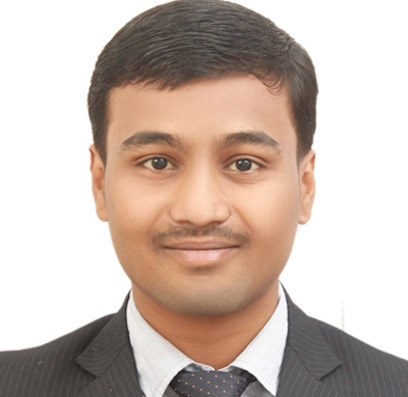

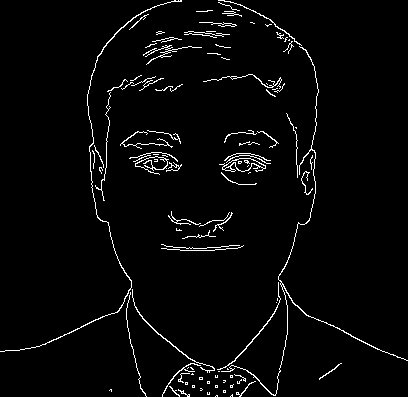

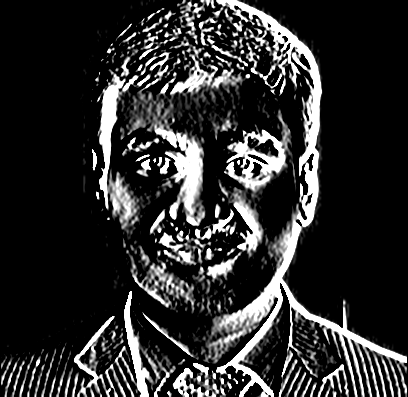

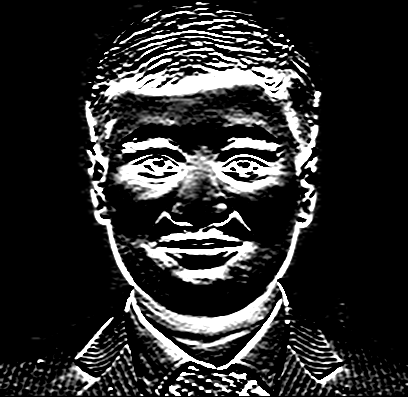

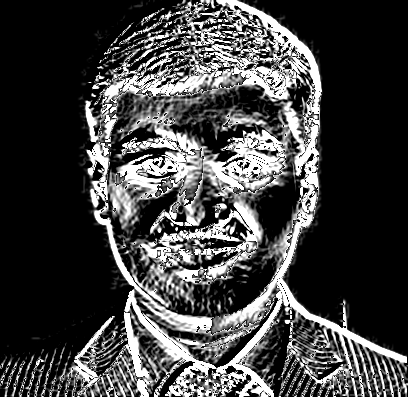

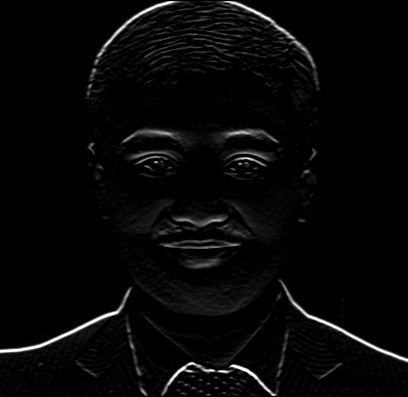

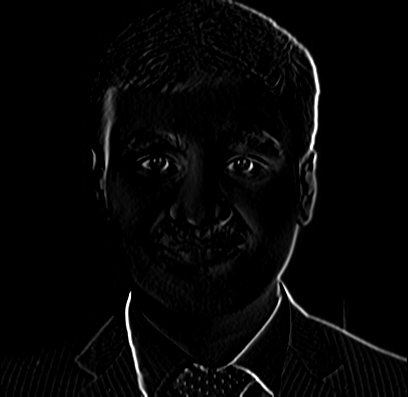

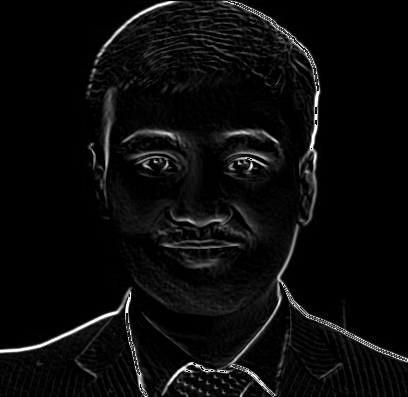

In [ ]:
import cv2
import numpy as np

img = cv2.imread('/content/input_Ashish.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img_gaussian = cv2.GaussianBlur(gray,(3,3),0)

#canny
img_canny = cv2.Canny(img,100,200)

#sobel
img_sobelx = cv2.Sobel(img_gaussian,cv2.CV_8U,1,0,ksize=5)
img_sobely = cv2.Sobel(img_gaussian,cv2.CV_8U,0,1,ksize=5)
img_sobel = img_sobelx + img_sobely


#prewitt
kernelx = np.array([[1,1,1],[0,0,0],[-1,-1,-1]])
kernely = np.array([[-1,0,1],[-1,0,1],[-1,0,1]])
img_prewittx = cv2.filter2D(img_gaussian, -1, kernelx)
img_prewitty = cv2.filter2D(img_gaussian, -1, kernely)


cv2_imshow(img)
cv2_imshow(img_canny)
cv2_imshow(img_sobelx)
cv2_imshow(img_sobely)
cv2_imshow(img_sobel)
cv2_imshow(img_prewittx)
cv2_imshow(img_prewitty)
cv2_imshow(img_prewittx + img_prewitty)


cv2.waitKey(0)
cv2.destroyAllWindows()

# Applying Canny, Sobel and Prewitt to Eyes

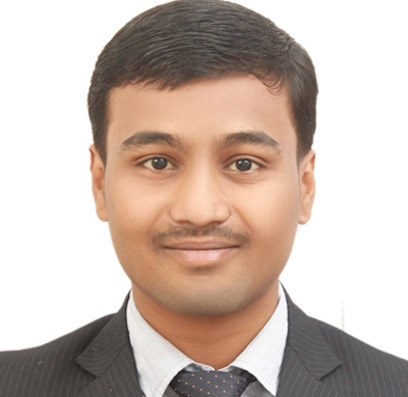

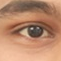

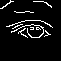

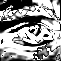

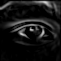

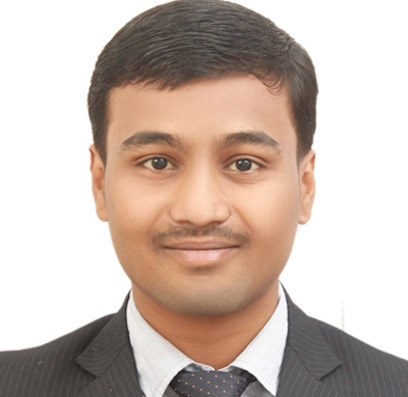

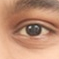

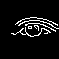

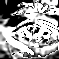

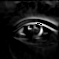

In [ ]:
import cv2
import numpy as np

# Load the image
img = cv2.imread('/content/input_Ashish.jpg')

# Load the pre-trained Haar Cascade classifier for eyes
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')

# Convert the image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Detect eyes in the image
eyes = eye_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

# Iterate over the detected eyes and apply edge detectors
for (ex, ey, ew, eh) in eyes:
    # Extract the region of interest (ROI) corresponding to the detected eyes
    roi = img[ey:ey + eh, ex:ex + ew]

    # Convert ROI to grayscale
    roi_gray = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)

    # Apply Gaussian Blur
    roi_blur = cv2.GaussianBlur(roi_gray, (3, 3), 0)

    # Apply Canny edge detector
    roi_canny = cv2.Canny(roi_blur, 100, 200)

    # Apply Sobel edge detectors
    roi_sobelx = cv2.Sobel(roi_blur, cv2.CV_8U, 1, 0, ksize=5)
    roi_sobely = cv2.Sobel(roi_blur, cv2.CV_8U, 0, 1, ksize=5)
    roi_sobel = roi_sobelx + roi_sobely

    # Apply Prewitt edge detectors
    kernelx = np.array([[1, 1, 1], [0, 0, 0], [-1, -1, -1]])
    kernely = np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]])
    roi_prewittx = cv2.filter2D(roi_blur, -1, kernelx)
    roi_prewitty = cv2.filter2D(roi_blur, -1, kernely)

    # Display the original image and the processed images
    cv2_imshow(img)
    cv2_imshow(roi)
    cv2_imshow(roi_canny)
    cv2_imshow(roi_sobel)
    cv2_imshow(roi_prewittx + roi_prewitty)

    cv2.waitKey(0)

# Close all windows
cv2.destroyAllWindows()


# Applying Canny, Sobel and Prewitt to Eyes and Mouth

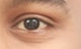

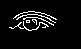

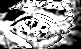

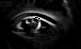

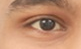

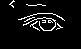

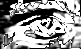

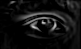

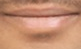

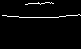

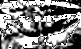

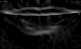

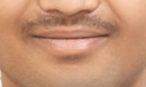

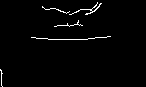

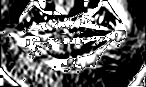

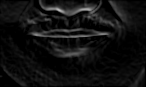

In [ ]:
import cv2
import numpy as np

# Load the image
img = cv2.imread('/content/input_Ashish.jpg')

# Load the pre-trained Haar Cascade classifier for mouth
mouth_cascade = cv2.CascadeClassifier('/content/haarcascade_mouth.xml')

# Convert the image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Detect mouth in the image
mouths = mouth_cascade.detectMultiScale(gray, scaleFactor=1.8, minNeighbors=5, minSize=(30, 30))

# Apply Sobel edge detectors
kernelx = np.array([[1, 1, 1], [0, 0, 0], [-1, -1, -1]])
kernely = np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]])

# Iterate over the detected mouths and apply edge detectors
for (mx, my, mw, mh) in mouths:
    # Extract the region of interest (ROI) corresponding to the detected mouth
    roi_mouth = img[my:my + mh, mx:mx + mw]

    # Convert ROI to grayscale
    roi_gray_mouth = cv2.cvtColor(roi_mouth, cv2.COLOR_BGR2GRAY)

    # Apply Gaussian Blur
    roi_blur_mouth = cv2.GaussianBlur(roi_gray_mouth, (3, 3), 0)

    # Apply Canny edge detector if needed
    roi_canny_mouth = cv2.Canny(roi_blur_mouth, 100, 200)

    # Apply Sobel edge detectors
    roi_sobelx_mouth = cv2.Sobel(roi_blur_mouth, cv2.CV_8U, 1, 0, ksize=5)
    roi_sobely_mouth = cv2.Sobel(roi_blur_mouth, cv2.CV_8U, 0, 1, ksize=5)
    roi_sobel_mouth = roi_sobelx_mouth + roi_sobely_mouth

    # Apply Prewitt edge detectors
    roi_prewittx_mouth = cv2.filter2D(roi_blur_mouth, -1, kernelx)
    roi_prewitty_mouth = cv2.filter2D(roi_blur_mouth, -1, kernely)

    # Display the processed images for mouth
    cv2_imshow(roi_mouth)
    cv2_imshow(roi_canny_mouth)
    cv2_imshow(roi_sobel_mouth)
    cv2_imshow(roi_prewittx_mouth + roi_prewitty_mouth)

    cv2.waitKey(0)

cv2.destroyAllWindows()
